In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import csv

In [9]:
train__path = "/tested.csv"
test_path = "/tested.csv"
train_data = pd.read_csv(train__path)
test_data = pd.read_csv(test_path)

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# New Section

In [11]:
train_data.shape


(418, 12)

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [13]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
test_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
# to shorten up null values as it has a alot of it
train_data.drop('Cabin',axis = 1, inplace=True)
test_data.drop('Cabin',axis = 1,inplace = True)

In [17]:
train_data.shape

(418, 11)

In [18]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [19]:
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [21]:
train_data.Age.mean()

30.272590361445783

In [22]:
train_data.Age.median()

27.0

In [23]:
test_data.Age.mean()

30.272590361445783

In [24]:
test_data.Age.median()

27.0

In [25]:
(30.2 + 27 + 30.2 + 27)/4

28.6

In [26]:
train_data['Age'].replace(np.nan,28.6,inplace = True)
test_data['Age'].replace(np.nan,28.6,inplace = True)


In [27]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [32]:
train_data.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [33]:
test_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [29]:
test_data.Fare.mean()

35.627188489208635

In [34]:
emb = train_data.Embarked.dropna().mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(emb)
test_data['Fare'].replace(np.nan,35.6271, inplace=True)


In [35]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [36]:
test_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

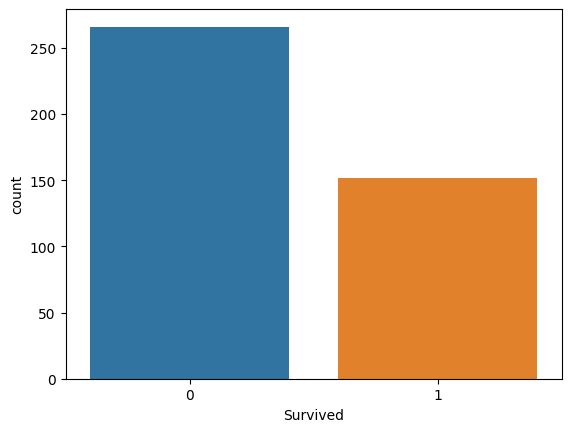

In [37]:
sns.countplot(x = 'Survived', data= train_data)
plt.show()

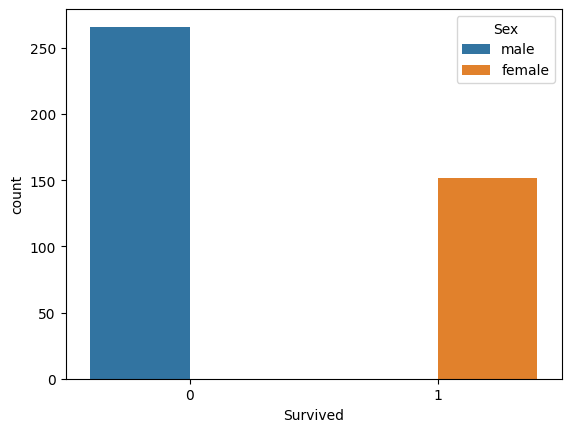

In [40]:
sns.countplot(x = 'Survived',hue = 'Sex', data= train_data)
plt.show()


In [41]:
ws = train_data.loc[train_data.Sex == 'female']['Survived']
wsr = sum(ws) / len(ws) * 100
print('Woman Survivor rate: ',wsr)

Woman Survivor rate:  100.0


In [42]:
ms = train_data.loc[train_data.Sex == 'female']['Survived']
msr = sum(ms) / len(ms) * 100
print('men Survivor rate: ',msr)

men Survivor rate:  100.0


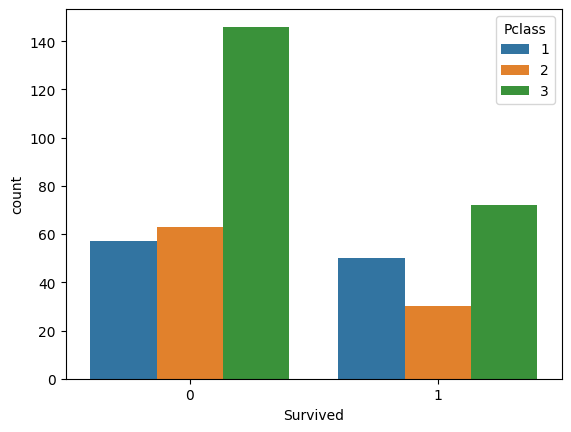

In [43]:
sns.countplot(x = 'Survived',hue = 'Pclass', data= train_data)
plt.show()


In [44]:
c1 = train_data.loc[train_data.Pclass == 1]['Survived']
c1r = sum(c1) / len(c1) * 100
print('Passenger class 1 survivor rate: ',c1r)

Passenger class 1 survivor rate:  46.728971962616825


In [45]:
c2  = train_data.loc[train_data.Pclass == 2]['Survived']
c2r = sum(c2) / len(c2) * 100
print('Passenger class 2 survivor rate: ',c2r)

Passenger class 2 survivor rate:  32.25806451612903


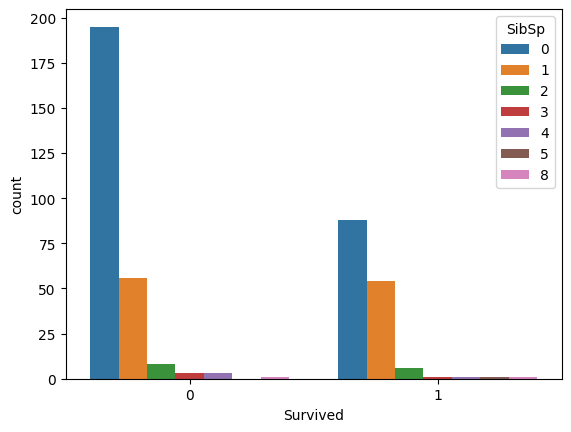

In [48]:
sns.countplot(x = 'Survived',hue = 'SibSp', data= train_data)
plt.show()


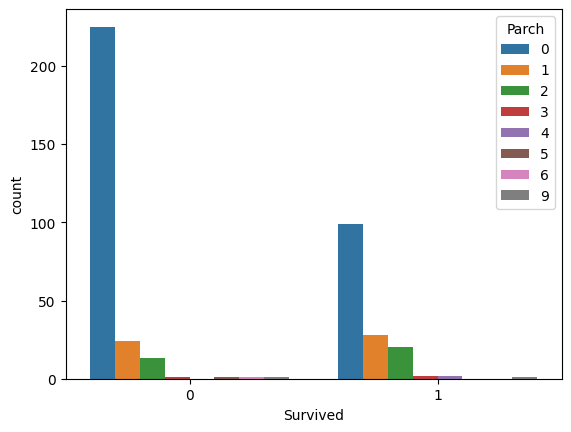

In [49]:
sns.countplot(x = 'Survived',hue = 'Parch', data= train_data)
plt.show()


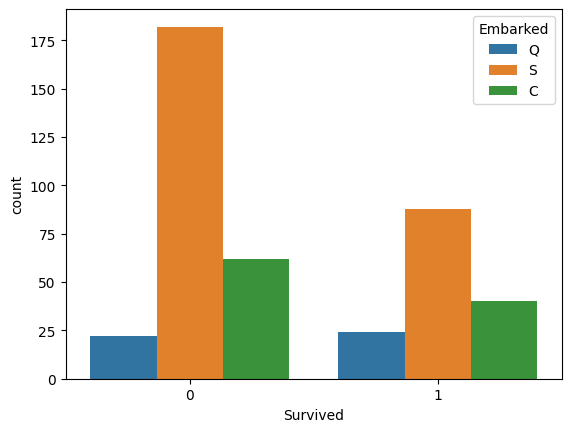

In [50]:
sns.countplot(x = 'Survived',hue = 'Embarked', data= train_data)
plt.show()


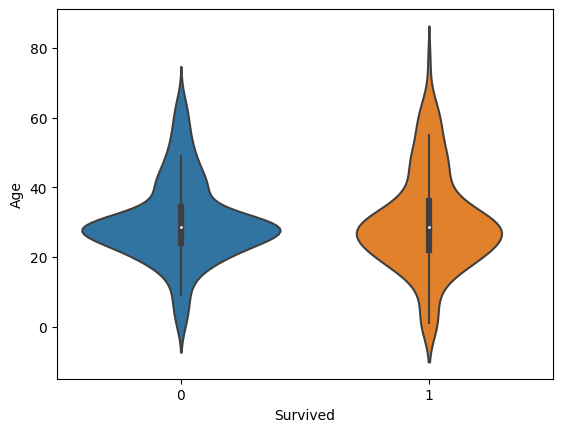

In [51]:
sns.violinplot(x = 'Survived',y = 'Age', data= train_data)
plt.show()


In [53]:
train_data['Sex'] = train_data['Sex'].map({'female': 1,'male':0}).astype(int)
test_data['Sex'] = test_data['Sex'].map({'female': 1,'male' :0}).astype(int)

In [54]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S


In [55]:
emb_dummy_train = pd.get_dummies(train_data['Embarked'])
train_data = pd.concat([train_data, emb_dummy_train], axis = 1)

emb_dummy_test = pd.get_dummies(test_data['Embarked'])
test_data = pd.concat([test_data, emb_dummy_test], axis = 1)



In [56]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q,0,1,0
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S,0,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S,0,0,1


In [59]:
train_data.drop({'Name','Ticket','Fare','Embarked'},axis = 1, inplace = True)
test_data.drop({'Name','Ticket','Fare','Embarked'},axis = 1, inplace = True)

In [60]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,892,0,3,0,34.5,0,0,0,1,0
1,893,1,3,1,47.0,1,0,0,0,1
2,894,0,2,0,62.0,0,0,0,1,0
3,895,0,3,0,27.0,0,0,0,0,1
4,896,1,3,1,22.0,1,1,0,0,1


In [61]:
test_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,892,0,3,0,34.5,0,0,0,1,0
1,893,1,3,1,47.0,1,0,0,0,1
2,894,0,2,0,62.0,0,0,0,1,0
3,895,0,3,0,27.0,0,0,0,0,1
4,896,1,3,1,22.0,1,1,0,0,1


In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data.iloc[:, 4:5] = sc.fit_transform(train_data.iloc[:, 4:5])
test_data.iloc[:, 3:4] = sc.fit_transform(test_data.iloc[:, 3:4])


In [63]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,892,0,3,0,0.361743,0,0,0,1,0
1,893,1,3,1,1.350862,1,0,0,0,1
2,894,0,2,0,2.537804,0,0,0,1,0
3,895,0,3,0,-0.231728,0,0,0,0,1
4,896,1,3,1,-0.627376,1,1,0,0,1


In [64]:
test_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,892,0,3,-0.755929,34.5,0,0,0,1,0
1,893,1,3,1.322876,47.0,1,0,0,0,1
2,894,0,2,-0.755929,62.0,0,0,0,1,0
3,895,0,3,-0.755929,27.0,0,0,0,0,1
4,896,1,3,1.322876,22.0,1,1,0,0,1


In [65]:
x_train = train_data.drop(['PassengerId', 'Survived'],axis = 1).values
y_train = train_data['Survived'].values

from sklearn.model_selection import train_test_split
x_train_train, x_train_test, y_train_train, y_train_test = train_test_split(x_train, y_train, test_size = 0.25 ,random_state = 19)

In [67]:
# @title Logistic Regression


In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_train, y_train_train)

LogisticRegression()

In [68]:
y_predlr = lr.predict(x_train_test)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix

acclr = accuracy_score(y_train_test, y_predlr)
print(acclr)

cmlr = confusion_matrix(y_train_test, y_predlr)
print(cmlr)

1.0
[[72  0]
 [ 0 33]]


In [73]:
# @title Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=7)
dtc.fit(x_train_train, y_train_train)

DecisionTreeClassifier(random_state=7)

In [77]:
y_preddtc = dtc.predict(x_train_test)

In [78]:
accdtc = accuracy_score(y_train_test, y_preddtc)
print(accdtc)

cmdtc = confusion_matrix(y_train_test, y_preddtc)
print(cmdtc)

1.0
[[72  0]
 [ 0 33]]


In [79]:
# @title Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, random_state = 7)
rfc.fit(x_train_train, y_train_train)

RandomForestClassifier(n_estimators=10, random_state=7)

In [81]:
y_predrfc = rfc.predict(x_train_test)

In [82]:
accrfc = accuracy_score(y_train_test, y_predrfc)
print(accrfc)

cmrfc = confusion_matrix(y_train_test, y_predrfc)
print(cmrfc)

1.0
[[72  0]
 [ 0 33]]
